In [1]:
import pandas as pd
import json
from tqdm import tqdm_notebook
import seaborn as sns
from utils import add_region
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/casos_covid19_7junho2020.csv"

In [3]:
data_df = pd.read_csv(PATH)

In [4]:
# data_df = add_region(data_df)
# data_df.to_csv(PATH)

In [5]:
data_df.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,region
174488,174488,174488,171465,2020-06-07,Brazil,ES,Fundão/ES,3202207,0,8,2,157,37.19373,729.92701,0.05096,SES,Sudeste
174489,174489,174489,171464,2020-06-07,Brazil,RN,Frutuoso Gomes/RN,2404002,0,0,0,5,0.00000,122.91052,0.00000,SES,Nordeste
174490,174490,174490,171463,2020-06-07,Brazil,MG,Frutal/MG,3127107,0,1,1,12,1.68079,20.16942,0.08333,SES,Sudeste
174491,174491,174491,171469,2020-06-07,Brazil,SP,Gabriel Monteiro/SP,3516507,0,0,0,2,0.00000,72.04611,0.00000,SES,Sudeste
174492,174492,174492,174492,2020-06-07,Brazil,TOTAL,TOTAL,0,495,36539,16771,693304,17.38734,329.91363,0.05270,NaN,TOTAL


In [6]:
data_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'date', 'country',
       'state', 'city', 'ibgeID', 'newDeaths', 'deaths', 'newCases',
       'totalCases', 'deaths_per_100k_inhabitants',
       'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', '_source',
       'region'],
      dtype='object')

# Análise do Brasil

In [7]:
brasil_df = data_df[data_df["state"] == "TOTAL"]
brasil_df.set_index("date", inplace=True)
brasil_df.sort_index(inplace=True)

In [8]:
brasil_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,region
date,,,,,,,,,,,,,,,,
2020-02-25,1,1,1,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.0,0.00048,0.0,NaN,TOTAL
2020-02-26,3,3,3,Brazil,TOTAL,TOTAL,0,0,0,0,1,0.0,0.00048,0.0,NaN,TOTAL
2020-02-27,5,5,5,Brazil,TOTAL,TOTAL,0,0,0,0,1,0.0,0.00048,0.0,NaN,TOTAL
2020-02-28,7,7,7,Brazil,TOTAL,TOTAL,0,0,0,1,2,0.0,0.00095,0.0,NaN,TOTAL
2020-02-29,8,8,9,Brazil,TOTAL,TOTAL,0,0,0,0,2,0.0,0.00095,0.0,NaN,TOTAL


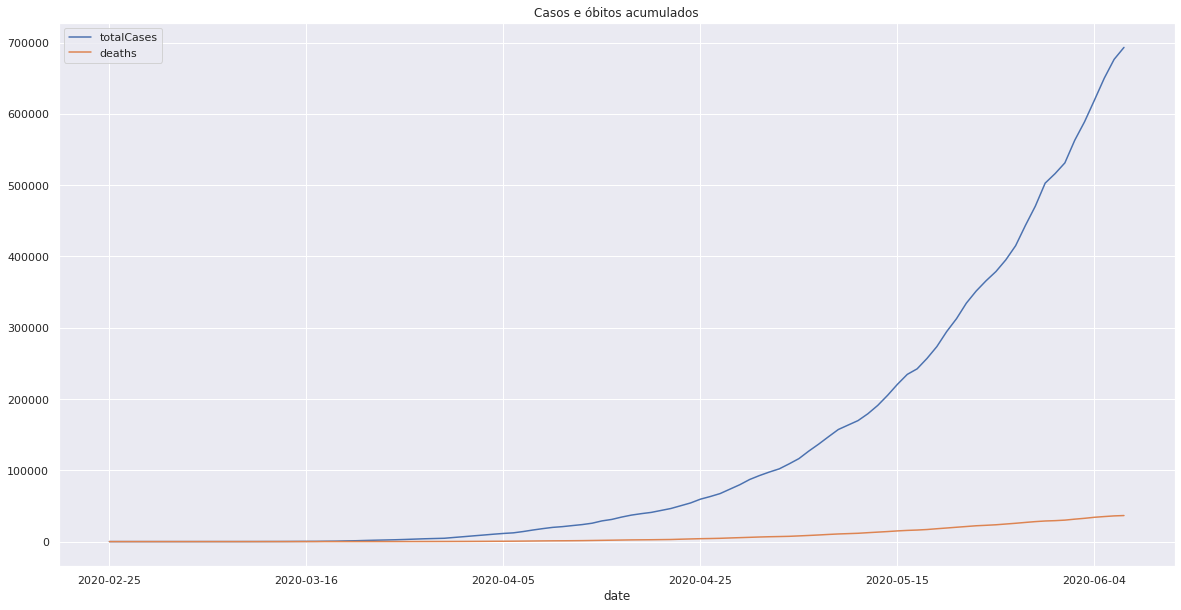

In [9]:
brasil_df[["totalCases", "deaths"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [10]:
aux_df = data_df[data_df["state"] != "TOTAL"].groupby(["date", "state"]).sum()
aux_df.reset_index(inplace=True)

In [11]:
aux_df

,date,state,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,2020-02-25,SP,0,0,0,3550308,0,0,1,1,0.00000,0.00816,0.00000
1,2020-02-26,SP,2,2,2,3550308,0,0,0,1,0.00000,0.00816,0.00000
2,2020-02-27,SP,4,4,4,3550308,0,0,0,1,0.00000,0.00816,0.00000
3,2020-02-28,SP,6,6,6,3550308,0,0,1,2,0.00000,0.01632,0.00000
4,2020-02-29,SP,9,9,8,3550308,0,0,0,2,0.00000,0.01632,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,2020-06-07,RS,57875730,57875730,57924822,1448853654,3,286,98,12135,1120.17454,54043.50112,10.70664
2342,2020-06-07,SC,41517400,41517400,41533923,1010402431,5,171,280,11565,671.24001,40733.84269,6.53482
2343,2020-06-07,SE,12906084,12906084,12920776,210294557,0,208,0,8972,404.10718,12753.83623,4.02905
2344,2020-06-07,SP,98138554,98138554,98213455,2007788463,87,9145,2524,143073,3587.81623,65456.83433,34.87933


In [12]:
estados_df = aux_df.set_index("date").pivot(columns="state")

In [13]:
estados_df.tail()

Unnamed: 0                                                 \
state              AC          AL          AM         AP          BA   
date                                                                   
2020-06-03  3546133.0  15875397.0   9727016.0  2619248.0  51414633.0   
2020-06-04  3647313.0  16328768.0  10004994.0  2694133.0  53840569.0   
2020-06-05  3749906.0  16787753.0  10285636.0  2769775.0  57308368.0   
2020-06-06  3853365.0  17250865.0  10569059.0  2846186.0  58886679.0   
2020-06-07  3959032.0  17716739.0  10853988.0  2923211.0  61676342.0   

                                                                      ...  \
state               CE        DF          ES          GO          MA  ...   
date                                                                  ...   
2020-06-03  28410611.0  154542.0  12201634.0  23329984.0  33482397.0  ...   
2020-06-04  29222388.0  158941.0  12549916.0  25270369.0  34438661.0  ...   
2020-06-05  30043657.0  163400.0  12901879.0  26473738.0  35405097.0  ...   
2020-06-06  30870182.0  167898.0  13256871.0  27201694.0  36548636.0  ...   
2020-06-07  31701651.0  172424.0  13614859.0  27934878.0  37533699.0  ...   

           deaths_by_totalCases                                                \
state                        PR       RJ       RN       RO       RR        RS   
date                                                                            
2020-06-03             15.08725  5.20600  8.76104  1.79493  0.42365  10.20477   
2020-06-04             14.87127  5.23615  8.81583  1.51265  0.38444   9.10170   
2020-06-05             14.82733  5.40267  9.28180  1.55980  0.36287  10.17738   
2020-06-06             14.82626  5.45462  9.28180  1.53961  0.36287   9.72565   
2020-06-07             14.82503  5.06276  9.54368  1.53748  0.35911  10.70664   

                                                 
state            SC       SE        SP       TO  
date                                             
2020-06-03  6.62734  3.93789  34.74754  3.11801  
2020-06-04  6.84374  4.13811  34.27598  3.14533  
2020-06-05  6.77894  4.30488  34.92175  3.13536  
2020-06-06  6.52330  4.02905  34.95736  3.13598  
2020-06-07  6.53482  4.02905  34.87933  3.65370  

[5 rows x 297 columns]

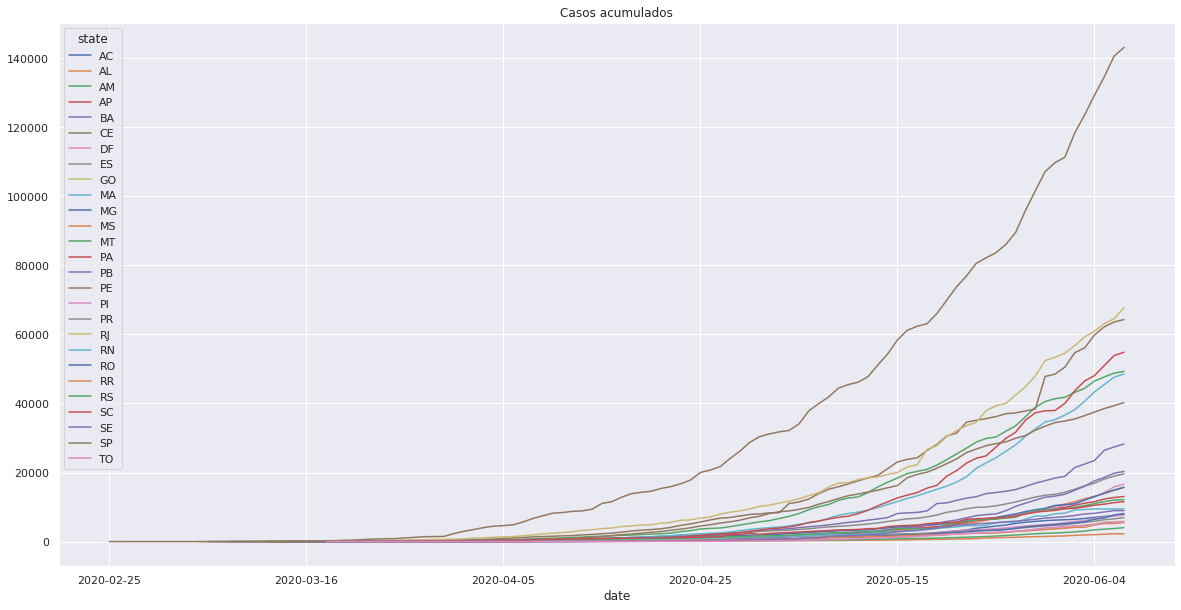

In [14]:
estados_df["totalCases"].plot(title="Casos acumulados")

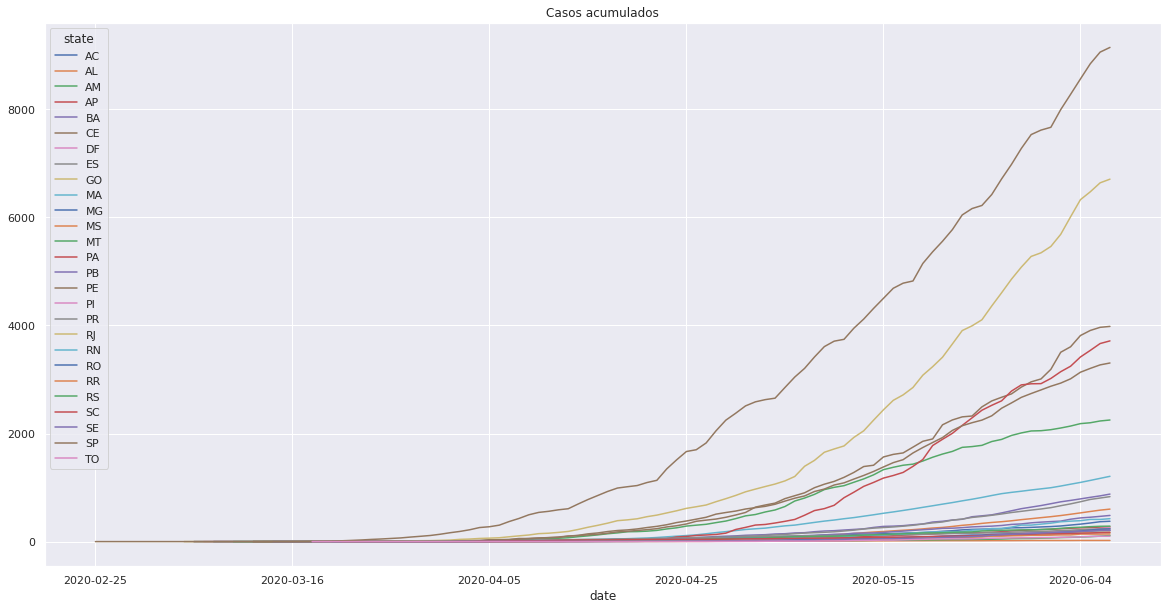

In [15]:
estados_df["deaths"].plot(title="Casos acumulados")

# Análise de regiões

In [16]:
regioes_df = data_df[data_df["region"] != "TOTAL"].groupby(["date", "region"]).sum()

In [17]:
regioes_df.tail(5)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1      ibgeID  \
date       region                                                           
2020-06-07 DF            172424        172424          170548     5300108   
           Nordeste   284526240     284526240       284479168  4141702779   
           Norte       77801627      77801627        77818522   660033134   
           Sudeste    218193363     218193363       218234701  4204772771   
           Sul        145199695     145199695       145262168  3549444911   

                     newDeaths  deaths  newCases  totalCases  \
date       region                                              
2020-06-07 DF                6     214       773       16623   
           Nordeste        188   11345      4933      243362   
           Norte            86    6919      2833      144378   
           Sudeste         189   17060      7189      246160   
           Sul              13     694       670       30597   

                     deaths_per_100k_inhabitants  \
date       region                                  
2020-06-07 DF                            7.09721   
           Nordeste                  12924.06360   
           Norte                      7187.55013   
           Sudeste                    6707.66977   
           Sul                        2488.91255   

                     totalCases_per_100k_inhabitants  deaths_by_totalCases  
date       region                                                           
2020-06-07 DF                              551.29428               0.01287  
           Nordeste                     418543.54325              79.38483  
           Norte                        254020.31137              15.49692  
           Sudeste                      152594.35350              62.44894  
           Sul                          113863.95448              32.06649

In [18]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("date")

In [19]:
regioes_df

,region,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
date,,,,,,,,,,,,
2020-02-25,Sudeste,0,0,0,3550308,0,0,1,1,0.00000,0.00816,0.00000
2020-02-26,Sudeste,2,2,2,3550308,0,0,0,1,0.00000,0.00816,0.00000
2020-02-27,Sudeste,4,4,4,3550308,0,0,0,1,0.00000,0.00816,0.00000
2020-02-28,Sudeste,6,6,6,3550308,0,0,1,2,0.00000,0.01632,0.00000
2020-02-29,Sudeste,9,9,8,3550308,0,0,0,2,0.00000,0.01632,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-07,DF,172424,172424,170548,5300108,6,214,773,16623,7.09721,551.29428,0.01287
2020-06-07,Nordeste,284526240,284526240,284479168,4141702779,188,11345,4933,243362,12924.06360,418543.54325,79.38483
2020-06-07,Norte,77801627,77801627,77818522,660033134,86,6919,2833,144378,7187.55013,254020.31137,15.49692


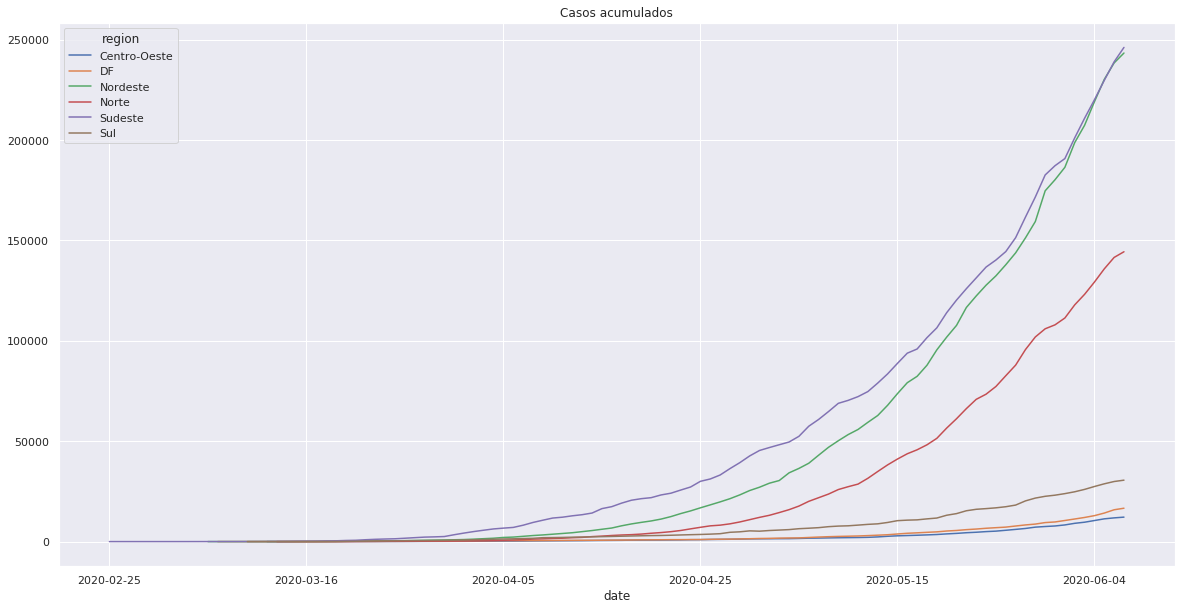

In [20]:
final_reg_df = regioes_df.pivot(columns="region")
final_reg_df["totalCases"].plot(title="Casos acumulados")

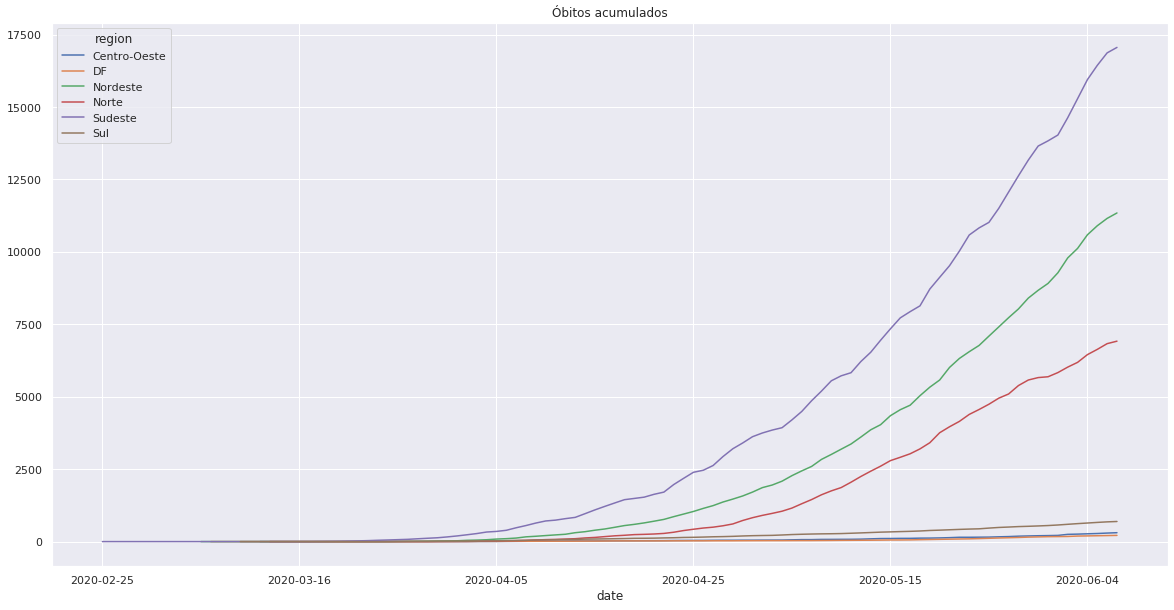

In [21]:
final_reg_df["deaths"].plot(title="Óbitos acumulados")

# Visualização dos dados mais recentes

In [22]:
final_reg_df.iloc[-1]["totalCases"]

region
Centro-Oeste     12184.0
DF               16623.0
Nordeste        243362.0
Norte           144378.0
Sudeste         246160.0
Sul              30597.0
Name: 2020-06-07, dtype: float64

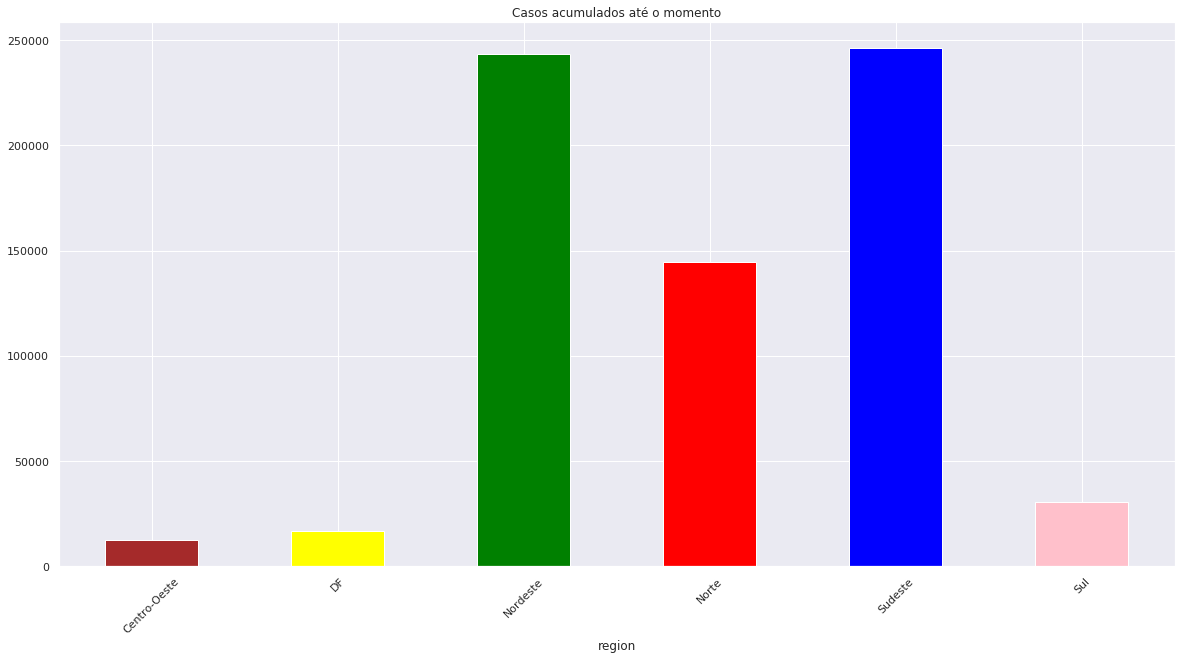

In [23]:
final_reg_df.iloc[-1]["totalCases"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

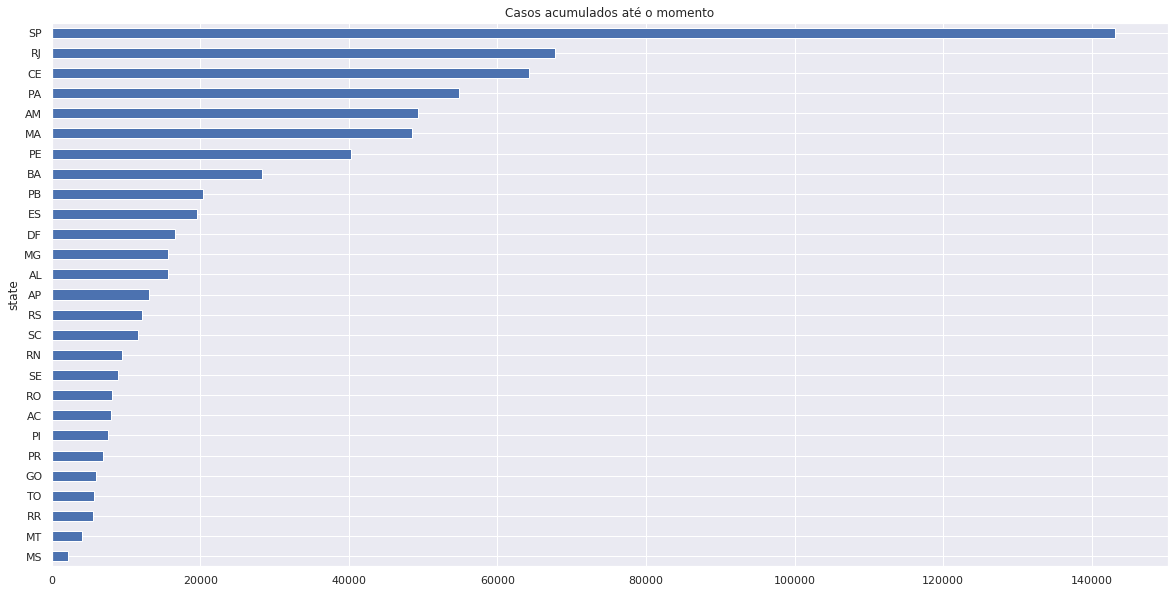

In [24]:
estados_df.iloc[-1]["totalCases"].sort_values().plot.barh(title="Casos acumulados até o momento")

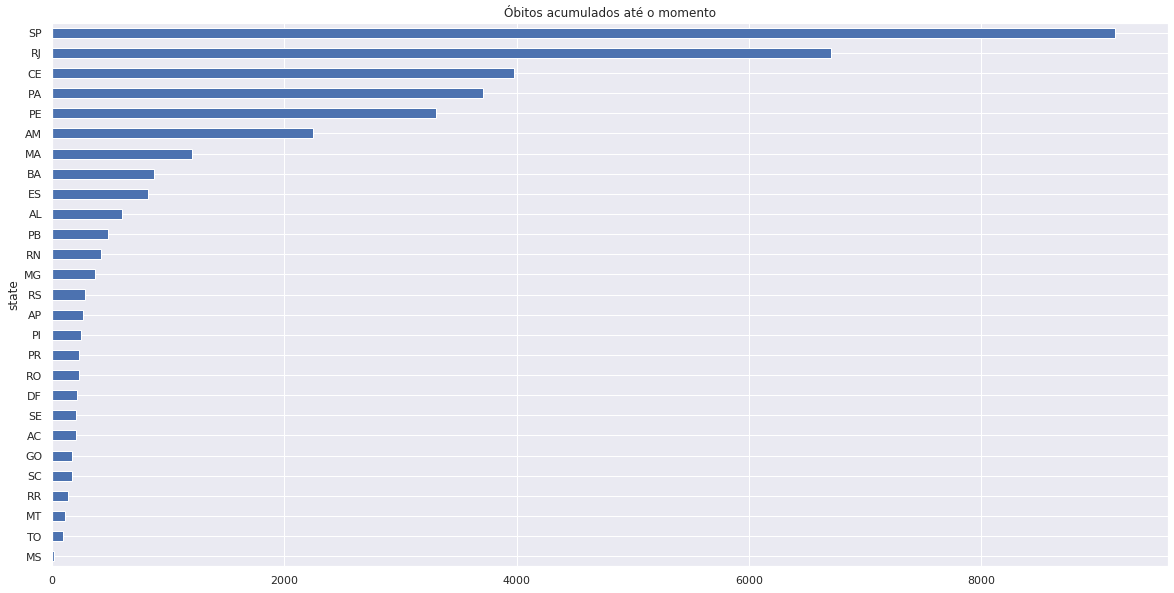

In [25]:
estados_df.iloc[-1]["deaths"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [26]:
estado2sigla = json.load(open("../dados/siglas_estados.json", "r"))
sigla2estado = {sigla : estado for (estado, sigla) in estado2sigla.items()}

In [27]:
estados = data_df[data_df["state"] != "TOTAL"]["state"].unique()

In [28]:
estado_summary = pd.DataFrame(index=estados)

In [29]:
estado_summary["casos"] = [estados_df.iloc[-1]["totalCases"][estado] for estado in estados]
estado_summary["obitos"] = [estados_df.iloc[-1]["deaths"][estado] for estado in estados]
estado_summary.rename(index=sigla2estado, inplace=True)

In [30]:
estado_summary

,casos,obitos
São Paulo,143073.0,9145.0
Rio de Janeiro,67756.0,6707.0
Espírito Santo,19619.0,832.0
Bahia,28250.0,879.0
Distrito Federal,16623.0,214.0
Alagoas,15707.0,601.0
Minas Gerais,15712.0,376.0
Rio Grande do Sul,12135.0,286.0
Pernambuco,40242.0,3305.0
Goiás,5898.0,173.0


In [31]:
estado_summary.to_excel("../dados/processados/casos_obitos_por_estado.xlsx")